<a href="https://colab.research.google.com/github/SAIKARTHIGEYAN1512/review2/blob/main/resnet_v2_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = 224
TRAINING_DIR = "/content/chest_xray/chest_xray/train"
training_datagen = ImageDataGenerator(rescale = 1./255 ,
                                      shear_range=0.2,
                                      zoom_range=0.2)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(IMG_SIZE,IMG_SIZE) ,class_mode='categorical',
                                                       batch_size=64,shuffle=True )


TEST_DIR = "/content/chest_xray/chest_xray/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE), class_mode = None , batch_size = 64,
                                                  shuffle = False)


VAL_DIR = "/content/chest_xray/chest_xray/val"
val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = val_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE),class_mode='categorical',
                                                       batch_size=64,shuffle= False)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


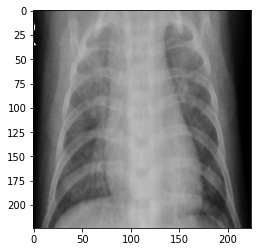

In [ ]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [ ]:
import tensorflow_hub as hub

URL='https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4' 
feature_extractor = hub.KerasLayer(URL, input_shape=(224,224,3))
feature_extractor.trainable = False

In [ ]:
model = tf.keras.models.Sequential([    
    feature_extractor,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              25615849  
_________________________________________________________________
dense (Dense)                (None, 64)                64128     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 25,684,267
Trainable params: 68,418
Non-trainable params: 25,615,849
_______________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.95):
      self.model.stop_training=True

callbacks=myCallback()
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')]
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=METRICS )

history = model.fit(train_generator , epochs=5 , callbacks=[callbacks], validation_data=val_generator)

Epoch 1/5
82/82 [==============================] - 823s 10s/step - loss: 0.5210 - accuracy: 0.7713 - precision: 0.7713 - recall: 0.7713 - val_loss: 0.4345 - val_accuracy: 0.7933 - val_precision: 0.7933 - val_recall: 0.7933
Epoch 2/5
82/82 [==============================] - 817s 10s/step - loss: 0.2807 - accuracy: 0.8806 - precision: 0.8806 - recall: 0.8806 - val_loss: 0.4015 - val_accuracy: 0.8397 - val_precision: 0.8397 - val_recall: 0.8397
Epoch 3/5
82/82 [==============================] - 813s 10s/step - loss: 0.2421 - accuracy: 0.9001 - precision: 0.9001 - recall: 0.9001 - val_loss: 0.3299 - val_accuracy: 0.8638 - val_precision: 0.8638 - val_recall: 0.8638
Epoch 4/5
82/82 [==============================] - 821s 10s/step - loss: 0.2122 - accuracy: 0.9126 - precision: 0.9126 - recall: 0.9126 - val_loss: 0.3346 - val_accuracy: 0.8638 - val_precision: 0.8638 - val_recall: 0.8638
Epoch 5/5
82/82 [==============================] - 822s 10s/step - loss: 0.2010 - accuracy: 0.9204 - precisi